In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression


import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df["diabets_yes"] = df.Outcome


In [10]:
df["diabets_no"] = df.Outcome.replace({1: 0,0: 1})

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabets_yes,diabets_no
0,6,148,72,35,0,33.6,0.627,50,1,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1,0


In [12]:
df_nr = df.drop(df.columns[8], axis = 1)

In [13]:
df_nr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabets_yes,diabets_no
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


In [14]:
df_nr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabets_yes,diabets_no
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,-0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,-0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,-0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,-0.238356
diabets_yes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,-1.000000
diabets_no,-0.221898,-0.466581,-0.065068,-0.074752,-0.130548,-0.292695,-0.173844,-0.238356,-1.000000,1.000000


In [15]:
Y = df_nr.iloc[:,-1]

In [16]:
X = df_nr.iloc[:,:7]

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.25)

In [18]:
nbG = GaussianNB()

In [19]:
nbG.fit(train_x, train_y)

GaussianNB()

In [20]:
pred_y = nbG.predict(test_x)
pred_train_y = nbG.predict(train_x)
pred_proba = nbG.predict_proba(test_x)[:,1]

In [21]:
conMat = confusion_matrix(test_y, pred_y)
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat)

In [22]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.7864583333333334
test_acc 0.7291666666666666


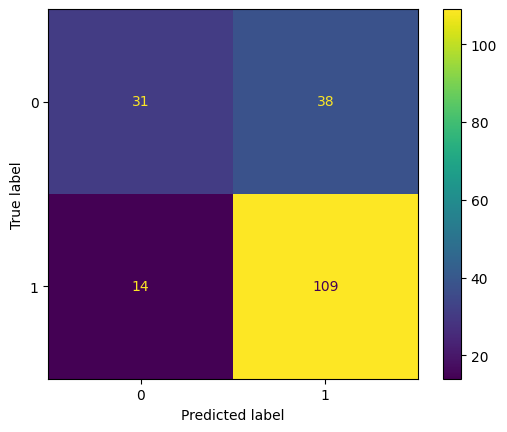

In [23]:
cmDisp.plot()

In [24]:
auc = roc_auc_score(test_y, pred_proba)

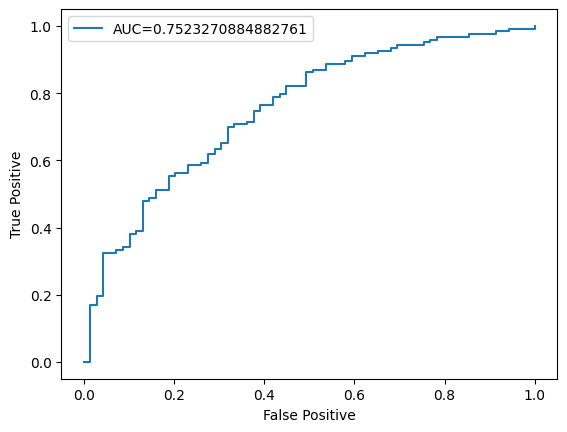

In [25]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [26]:
nbM = MultinomialNB()

In [27]:
nbM.fit(train_x, train_y)

MultinomialNB()

In [28]:
pred_y = nbM.predict(test_x)
pred_train_y = nbM.predict(train_x)
pred_proba = nbM.predict_proba(test_x)[:,-1]

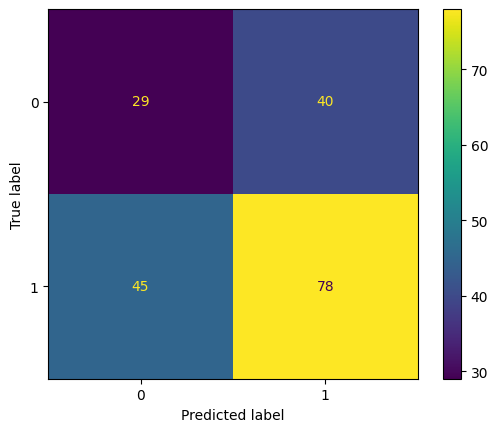

In [29]:
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()

In [30]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.6197916666666666
test_acc 0.5572916666666666


In [31]:
auc = roc_auc_score(test_y, pred_proba)

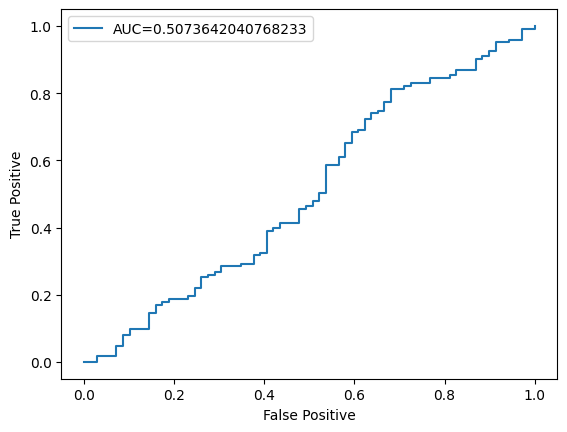

In [32]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [33]:
nbC = ComplementNB()


In [34]:
nbC.fit(train_x, train_y)

ComplementNB()

In [35]:
pred_y = nbC.predict(test_x)
pred_train_y = nbC.predict(train_x)
pred_proba = nbC.predict_proba(test_x)[:,-1]

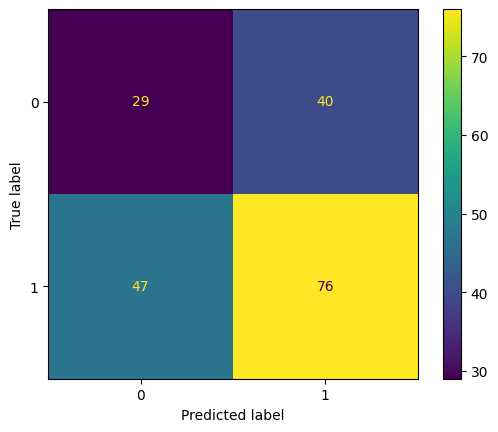

In [36]:
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()

In [37]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.6197916666666666
test_acc 0.546875


In [38]:
auc = roc_auc_score(test_y, pred_proba)

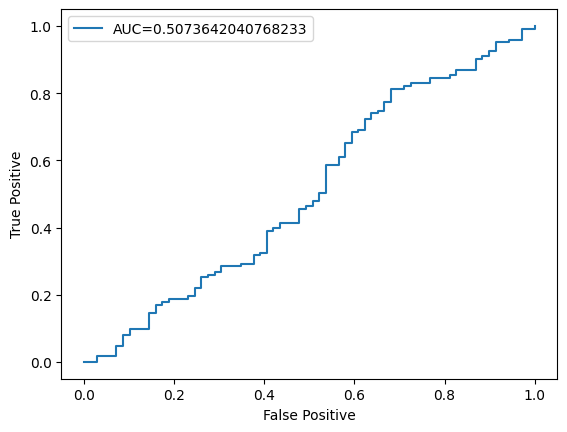

In [39]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [40]:
nbB = BernoulliNB()

train_acc 0.6684027777777778
test_acc 0.6041666666666666


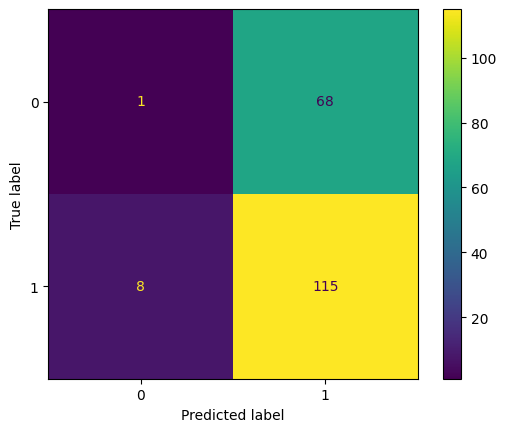

In [41]:
nbB.fit(train_x, train_y)
pred_y = nbB.predict(test_x)
pred_train_y = nbB.predict(train_x)
pred_proba = nbB.predict_proba(test_x)[:,-1]
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))
auc = roc_auc_score(test_y, pred_proba)


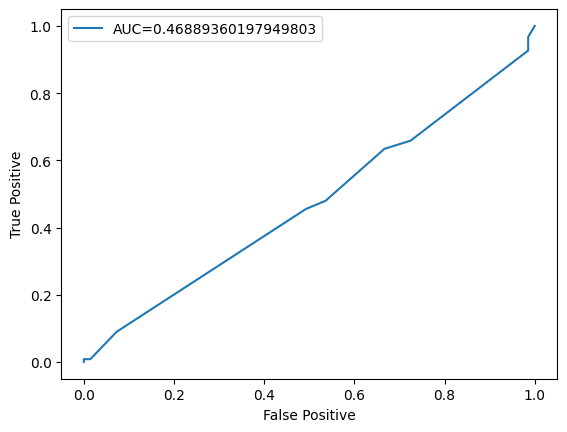

In [42]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

Деревья

In [43]:
clf = DecisionTreeClassifier( criterion = "entropy", random_state = 43, min_samples_split = 7, min_samples_leaf = 5 )

In [44]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=7, random_state=43)

In [45]:
pred_y = clf.predict(test_x)
pred_train_y = clf.predict(train_x)
pred_proba= clf.predict_proba(test_x)[:,-1]

In [46]:
print("train_acc", accuracy_score(pred_train_y, train_y))
print("test_acc", accuracy_score(pred_y, test_y))

train_acc 0.8888888888888888
test_acc 0.671875


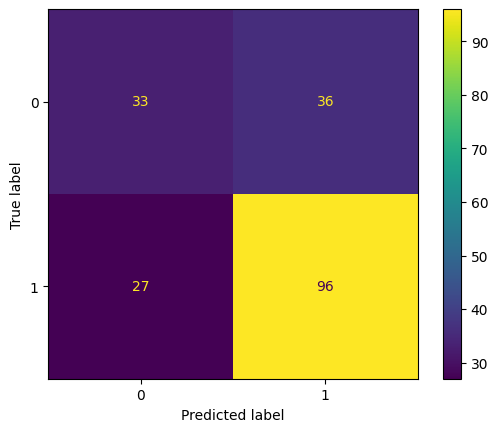

In [47]:
conMat = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(conMat).plot()

In [48]:
auc = roc_auc_score(test_y, pred_proba)

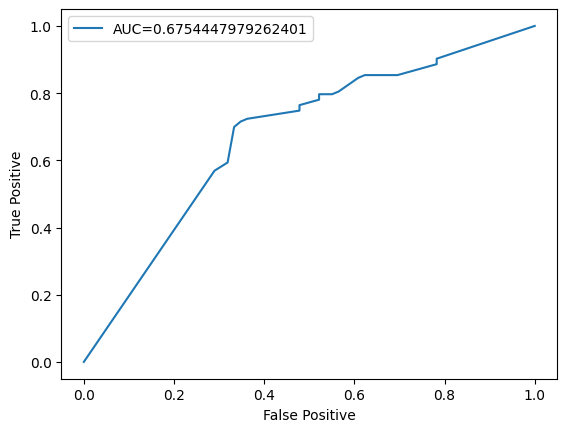

In [49]:
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [50]:
textDescr = tree.export_text(clf, feature_names = list(df_nr.columns[:7]) )
print(textDescr)

|--- Glucose <= 127.50
|   |--- BMI <= 27.00
|   |   |--- Glucose <= 106.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  106.50
|   |   |   |--- BMI <= 22.95
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  22.95
|   |   |   |   |--- class: 1
|   |--- BMI >  27.00
|   |   |--- Pregnancies <= 4.50
|   |   |   |--- Glucose <= 92.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.85
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.85
|   |   |   |   |   |--- class: 1
|   |   |   |--- Glucose >  92.50
|   |   |   |   |--- BMI <= 45.40
|   |   |   |   |   |--- SkinThickness <= 5.00
|   |   |   |   |   |   |--- Glucose <= 114.50
|   |   |   |   |   |   |   |--- BloodPressure <= 75.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- BloodPressure >  75.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Glucose >  114.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Sk

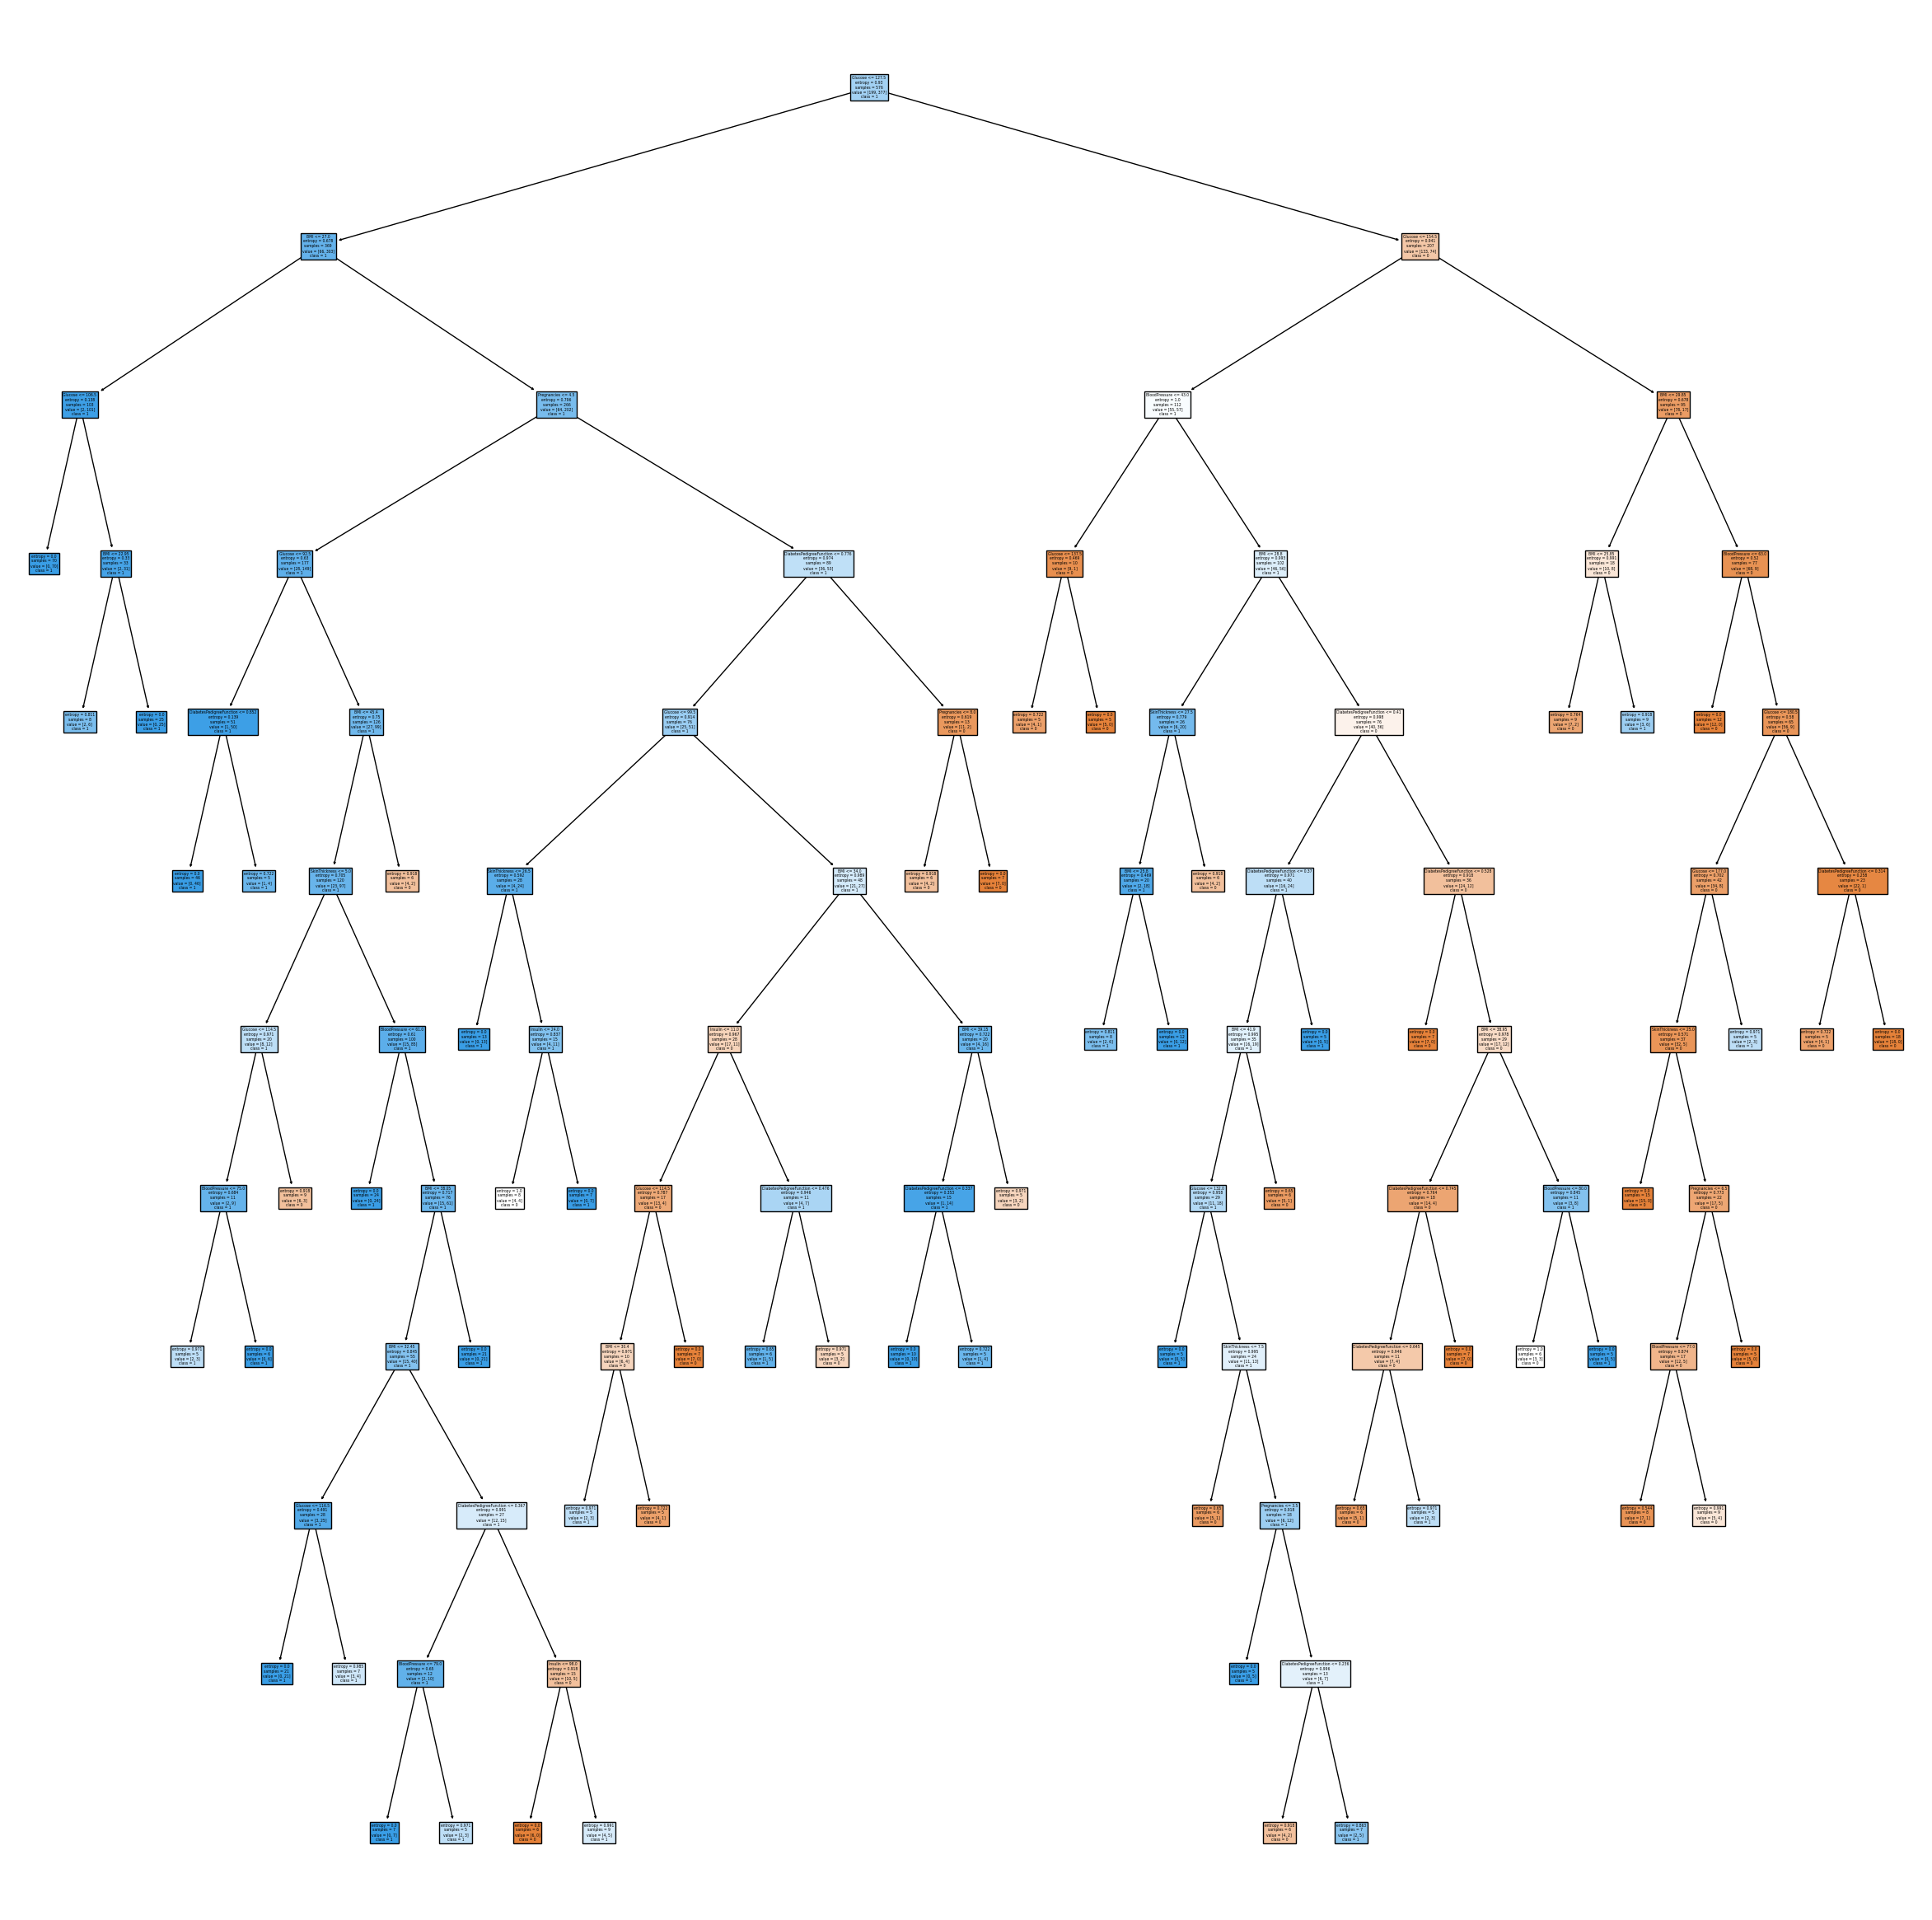

In [51]:
fig = plt.figure(figsize=(30,30))
res = tree.plot_tree(clf, 
                   feature_names = list(df_nr.columns[:7]) ,  
                   class_names = ['0', '1'],
                   filled = True)

Кросс-валидация

KFold

In [52]:
dtc = DecisionTreeClassifier()
kFold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(dtc, X, Y, cv = kFold)

print(scores)
print(f"В среднем точность классификации моделью: {scores.mean()} со средним разбросом {scores.std()}")

[0.72077922 0.65584416 0.65584416 0.77124183 0.66013072]
В среднем точность классификации моделью: 0.6927680162974281 со средним разбросом 0.04633509068344929


StratifiedKFold

In [53]:
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle = True)
scores = cross_val_score(dtc, X, Y, cv = stratifiedKfold)

print(scores)
print(f"В среднем точность классификации моделью: {scores.mean()} со средним разбросом {scores.std()}")

[0.73376623 0.64285714 0.66883117 0.73202614 0.67320261]
В среднем точность классификации моделью: 0.690136660724896 со средним разбросом 0.036426109195425126


Leave-One-Out (LOO)

In [54]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(dtc, X, Y, cv = loo, n_jobs = -1)

print(f"Количество блоков: {len(scores)}")
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Количество блоков: 768
Средняя оценка качества прогнозирования модели: 0.6875, средний разброс значений: 0.46351240544347894


In [55]:
i = 0
for train_index, test_index in stratifiedKfold.split(X, Y):
    ++i
    X_train, X_test = X.to_numpy()[train_index], X.to_numpy()[test_index]
    Y_train, Y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    clf.fit(X_train, Y_train)
    pred_y = clf.predict(X_test)
    print("acc_score", accuracy_score(pred_y, Y_test))

acc_score 0.7402597402597403
acc_score 0.6558441558441559
acc_score 0.7142857142857143
acc_score 0.7124183006535948
acc_score 0.7777777777777778


In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 4, 5,6,7,8,9], 'min_samples_split': [2, 3, 4,5,6,7,8,9], 'min_samples_leaf': [1, 2, 3,4,5,6,7,8,9,10]}

In [57]:
gsCV = GridSearchCV(clf, parameters, cv = 15)

In [58]:
gsCV.fit(train_x, train_y)

GridSearchCV(cv=15,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_samples_leaf=5,
                                              min_samples_split=7,
                                              random_state=43),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [59]:
gsCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [60]:
bp = gsCV.best_params_

In [61]:
md, msl, mss = [*bp.values()]

In [62]:
md

5

In [63]:
i = 0
for train_index, test_index in stratifiedKfold.split(X, Y):
    i = i + 1
    X_train, X_test = X.to_numpy()[train_index], X.to_numpy()[test_index]
    Y_train, Y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    clf = DecisionTreeClassifier( criterion = "entropy", random_state = 43, max_depth = md, min_samples_split = mss, min_samples_leaf = msl )
    
    clf.fit(X_train, Y_train)
    pred_y = clf.predict(X_test)
    print("acc_score " + str(i) + " выборки", accuracy_score(pred_y, Y_test))
    

acc_score 1 выборки 0.7402597402597403
acc_score 2 выборки 0.7532467532467533
acc_score 3 выборки 0.7207792207792207
acc_score 4 выборки 0.7320261437908496
acc_score 5 выборки 0.7058823529411765
